## Logist regression

Linear regression : h = W X + b, y = {-inf, +inf}
Logistic regression : h = sigmoid(W X + b) , 0 < h < 1,  y = {0, 1}

In [6]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3, suppress=True)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [7]:
sigmoid(-5), sigmoid(0), sigmoid(5), sigmoid(5000000)

(0.0066928509242848554, 0.5, 0.9933071490757153, 1.0)

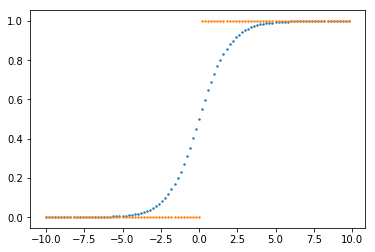

In [13]:
z = np.arange(-10, 10, 0.2)
h = sigmoid(z)
plt.scatter(z, h, s=2)
plt.scatter(z, np.round(h), s=2)

In [16]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

In [17]:
x_data = np.array(x_data)
y_data = np.array(y_data)
x_data.shape, y_data.shape

((6, 2), (6, 1))

사이킷런의 Logistic Regression 으로 핏팅하세요
Logistic Regression = sigmoid(Linear Regression)

In [18]:
from sklearn.linear_model import LogisticRegression

In [25]:
model = LogisticRegression(solver='lbfgs').fit(x_data,y_data[:,0])
model.score(x_data,y_data[:,0]) # accuracy 정확도

1.0

In [27]:
model.coef_, model.intercept_

(array([[1.087, 0.458]]), array([-4.88]))

In [33]:
# sigmoid(WX + b)
h = sigmoid(np.sum( model.coef_ * x_data, axis=1)+ model.intercept_) 
h

array([0.053, 0.209, 0.238, 0.699, 0.873, 0.928])

In [35]:
np.round(h)#판정내리기

array([0., 0., 0., 1., 1., 1.])

In [34]:
y_data   # 2:35 

array([[0],
       [0],
       [0],
       [1],
       [1],
       [1]])